In [204]:
# real input
ipositions = [
             -7   -1   6;
             6    -9  -9;
             -12   2  -7;
             4   -17 -12
            ]


4×3 Array{Int64,2}:
  -7   -1    6
   6   -9   -9
 -12    2   -7
   4  -17  -12

In [225]:
# example
epositions = [
             -1 0 2;
             2 -10 -7
             4 -8 8
             3 5 -1
            ]

4×3 Array{Int64,2}:
 -1    0   2
  2  -10  -7
  4   -8   8
  3    5  -1

In [200]:
function unit(x)
    if x == 0
        0
    elseif x > 0
        1
    else
        -1
    end
end

unit (generic function with 1 method)

In [201]:
function energy(pos, vel)
    pots = sum(abs.(pos), dims=2)
    kins = sum(abs.(vel), dims=2)
    tots = pots .* kins
    tot = sum(tots)
    tot
end
vel = [-3 -2 1; -1 1 3; 3 2 -3; 1 -1 -1]
pos = [2 1 -3; 1 -8 0; 3 -6 1; 2 0 4]
energy(pos, vel)

179

In [202]:
function oldnext(positions, velocities)
    for id in 1:4
        # apply gravity
        for snd in 1:4
            if snd == id
                continue
            end
            grav = unit.(positions[snd, :] - positions[id, :])
            velocities[id, :] += grav
        end
    end
    # apply velocity
    positions += velocities
    positions, velocities
end

oldnext (generic function with 1 method)

In [261]:
function next(positions, velocities)
    # we update the velocities
    for id in 1:4
        this = positions[id, :]'
        others = positions[1:4 .!= id, :]
        diffs = (others .> this) - (others .< this)
        grav = sum(diffs, dims = 1)'
        velocities[id, :] += grav
    end
    # and then the positions
    positions += velocities
    positions, velocities
end

function find_loop(ipositions)
    positions = ipositions
    velocities = zeros(Int64, 4, 3)

    pair = (copy(positions), copy(velocities))
    states = Dict()
    states[pair] = 0
    step = 0
    while step < 200_000
        step += 1
        positions, velocities = next(positions, velocities)
        #tot = energy(positions, velocities)

        pair = (copy(positions), copy(velocities))

        if haskey(states, pair)
            println(step, " seen at ", states[pair], " = ", pair)
            break
        else
            states[pair] = step
        end
    end
end
@time find_loop(ipositions)

  3.648660 seconds (16.88 M allocations: 10.685 GiB, 23.73% gc time)


In [256]:
function find_first(ipositions)
    positions = copy(ipositions)
    ivelocities = zeros(Int64, 4, 3)
    velocities = copy(ivelocities)

    pair = (copy(positions), copy(velocities))
    step = 0
    while step < 200_000
        step += 1
        positions, velocities = next(positions, velocities)
        #tot = energy(positions, velocities)

        pair = (copy(positions), copy(velocities))

        if positions == ipositions && velocities == ivelocities
            println(step, " loops to the start")
            return
        else
            states[pair] = step
        end
    end
    println("not found ", positions, velocities)
end

@time find_first(ipositions)

not found [224 141 -385; -127 125 -413; -194 -67 206; 88 -224 570][-44 43 -6; -14 -81 -18; 46 40 13; 12 -2 11]
  3.925667 seconds (16.62 M allocations: 10.667 GiB, 38.39% gc time)


In [337]:
using Plots

function animation(ipositions)
    positions = ipositions
    velocities = zeros(Int64, 4, 3)

    pair = (copy(positions))
    states = Vector()
    push!(states, pair)
    step = 0
    while step < 200_000
        step += 1
        positions, velocities = next(positions, velocities)
        #tot = energy(positions, velocities)
        push!(states, copy(positions))
    end
    states
end

@time ani_states = animation(ipositions)

  3.292643 seconds (15.82 M allocations: 10.626 GiB, 31.51% gc time)


200001-element Array{Any,1}:
 [-7 -1 6; 6 -9 -9; -12 2 -7; 4 -17 -12]                 
 [-6 -2 3; 3 -8 -8; -9 -1 -8; 3 -14 -9]                  
 [-4 -4 -3; -2 -6 -7; -3 -7 -9; 0 -8 -3]                 
 [1 -9 -11; -8 -5 -5; 4 -12 -7; -6 1 1]                  
 [5 -13 -16; -11 -5 -4; 8 -14 -4; -11 7 2]               
 [8 -16 -18; -12 -6 -3; 9 -13 -1; -14 10 0]              
 [10 -16 -17; -12 -8 -1; 7 -11 1; -14 10 -5]             
 [9 -13 -13; -11 -11 0; 4 -8 0; -11 7 -9]                
 [5 -7 -6; -8 -13 -1; 0 -6 -3; -6 1 -12]                 
 [-2 0 2; -2 -12 -5; -5 -5 -7; 0 -8 -12]                 
 [-9 4 7; 4 -8 -10; -7 -5 -10; 3 -16 -9]                 
 [-13 5 9; 7 -3 -13; -8 -6 -11; 5 -21 -7]                
 [-14 3 8; 7 1 -13; -8 -6 -11; 6 -23 -6]                 
 ⋮                                                       
 [543 -367 -192; 62 851 -122; -535 -396 8; -79 -113 284] 
 [529 -322 -224; 46 800 -154; -519 -380 31; -65 -123 325]
 [512 -276 -253; 29 746 -185; -500 -361 53;

In [505]:
function diff(a, b)
    (a .> b) - (a .< b)
end
ps = copy(epositions)
p = ps[1:1, :]
println(p)
diffs = diff(ps, p)
for diff in diffs
    println(diff)
end

[-1 0 2]
0
1
1
1
0
-1
-1
1
0
-1
1
-1


In [567]:


function grav(planet, planets)
    diffs = diff(planets, planet)
    sum(diffs, dims = 1)
end

function nextvel(positions, velocities)
    # we update the velocities
    for id in 1:4
        this = positions[id:id, :]
        #this = view(positions, id:id, :)
        gravs = grav(this, positions)
        velocities[id:id, :] += gravs
    end
    velocities
end

# terribly slow, allocates and stuff
function nextvel2(ps, velocities)
    velocities += mapslices(x->vec(grav(x', ps)), ps, dims=[2])
    velocities
end

function nextvel3(ps, vs)
    for i in 1:4
        this = positions[i:i, :]
        diffs = diff(ps, this)
        for j in 1:4
            vs[i:i, :] += diffs[j:j, :]
        end
    end
    vs
end

function fewtimes()
    positions = copy(ipositions)
    velocities = zeros(Int64, 4, 3)
    for i in 0:100_000
        velocities = nextvel(positions, velocities)
        positions += velocities
    end
    positions
end

Profile.clear()
@time s = fewtimes()
@profile s = fewtimes()
println(s) # [-638 485 -1944; -837 -73 1532; 800 -105 277; 666 -332 113]
Profile.print()

  0.958071 seconds (4.59 M allocations: 3.556 GiB, 19.67% gc time)
[-638 485 -1944; -837 -73 1532; 800 -105 277; 666 -332 113]
1    ./multidimensional.jl:685; _unsafe_getindex(::IndexLinear, ::...
2    ./reducedim.jl:238; _mapreducedim!(::typeof(identity),...
1027 ./task.jl:333; (::IJulia.var"#15#18")()
 1027 ...F1GUo/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  1027 ./essentials.jl:708; invokelatest
   1027 ./essentials.jl:709; #invokelatest#1
    1027 ...c/execute_request.jl:67; execute_request(::ZMQ.Socket, ::...
     1027 .../SoftGlobalScope.jl:218; softscope_include_string(::Modu...
      1027 ./boot.jl:330; eval
       1017 ./In[567]:40; fewtimes()
        58  ./In[567]:11; nextvel(::Array{Int64,2}, ::Ar...
         58 ./abstractarray.jl:981; getindex
          1  ./multidimensional.jl:669; _getindex
          57 ./multidimensional.jl:670; _getindex
           1  ./multidimensional.jl:681; _unsafe_getindex(::IndexLine...
            1 ./multidimensional.jl:551; index_shape
     

                  1 ./broadcast.jl:884; broadcast_unalias
                   1 ./abstractarray.jl:1155; unalias
                    1 ...stractarray.jl:1189; mightalias
                  3 ./broadcast.jl:597; extrude
                   3 ./broadcast.jl:552; newindexer
                    3 ./broadcast.jl:553; shapeindexer
                     3 ./broadcast.jl:557; _newindexer
                      3 ./broadcast.jl:558; _newindexer
                       3 ./operators.jl:193; !=
                        3 ./promotion.jl:401; ==
              4 ./broadcast.jl:908; copyto!
               2 ./simdloop.jl:0; macro expansion
               2 ./simdloop.jl:77; macro expansion
                2 ./broadcast.jl:909; macro expansion
                 2 ./broadcast.jl:563; getindex
                  1 ./broadcast.jl:602; _broadcast_getindex
                   1 ./broadcast.jl:626; _getindex
                    1 ./broadcast.jl:627; _getindex
                     1 ./broadcast.jl:596; _broadcast_geti

In [569]:
# trival translation of this to C is amazingly faster (x1000 speedup)
function fewtimes()
    positions = copy(ipositions)
    velocities = zeros(Int64, 4, 3)
    for step in 0:100_000
        # order of loops here doesn't seem to have any effect
        for i in 1:3
            for j in 1:4
                a = (
                    (positions[j, i] < positions[1, i]) - (positions[j, i] > positions[1, i]) +
                    (positions[j, i] < positions[2, i]) - (positions[j, i] > positions[2, i]) +
                    (positions[j, i] < positions[3, i]) - (positions[j, i] > positions[3, i]) +
                    (positions[j, i] < positions[4, i]) - (positions[j, i] > positions[4, i])
                )
                velocities[j, i] += a
            end
        end
        positions += velocities
    end
    positions
end

Profile.clear()
@time s = fewtimes()
@profile s = fewtimes()
println(s) # [-638 485 -1944; -837 -73 1532; 800 -105 277; 666 -332 113]
Profile.print()

  0.978913 seconds (5.05 M allocations: 95.017 MiB, 0.88% gc time)
[-638 485 -1944; -837 -73 1532; 800 -105 277; 666 -332 113]
1076 ./task.jl:333; (::IJulia.var"#15#18")()
 1076 ...F1GUo/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  1076 ./essentials.jl:708; invokelatest
   1076 ./essentials.jl:709; #invokelatest#1
    1076 ...c/execute_request.jl:67; execute_request(::ZMQ.Socket, ::...
     1076 .../SoftGlobalScope.jl:218; softscope_include_string(::Modu...
      1076 ./boot.jl:330; eval
       2   ./In[569]:0; fewtimes()
       851 ./In[569]:9; fewtimes()
        41 ./array.jl:745; getindex(::Array{Int64,2}, ::I...
       110 ./In[569]:15; fewtimes()
        2  ./array.jl:745; getindex
        77 ./array.jl:784; setindex!
       18  ./In[569]:18; fewtimes()
        2  ./arraymath.jl:44; +(::Array{Int64,2}, ::Array{Int...
         1 ./tuple.jl:43; iterate
          1 ./tuple.jl:43; iterate
           1 ./tuple.jl:24; getindex
        14 ./arraymath.jl:47; +(::Array{Int64,2}, ::Array{I

In [565]:
function fewtimes()
    # row-column or column-row doesn't seem to effect the time
    positions = copy(ipositions)'
    velocities = zeros(Int64, 3, 4)
    for step in 0:100_000
        # order of loops here doesn't seem to have any effect
        for j in 1:4
            for i in 1:3
                velocities[i, j] += (
                    (positions[i, j] < positions[i, 1]) - (positions[i, j] > positions[i, 1]) +
                    (positions[i, j] < positions[i, 2]) - (positions[i, j] > positions[i, 2]) +
                    (positions[i, j] < positions[i, 3]) - (positions[i, j] > positions[i, 3]) +
                    (positions[i, j] < positions[i, 4]) - (positions[i, j] > positions[i, 4])
                )
            end
        end
        positions += velocities
    end
    positions
end
Profile.clear()
@time s = fewtimes()
@profile s = fewtimes()
println(s) # [-638 485 -1944; -837 -73 1532; 800 -105 277; 666 -332 113]
Profile.print()

  0.996611 seconds (5.05 M allocations: 95.017 MiB, 1.07% gc time)
[-638 -837 800 666; 485 -73 -105 -332; -1944 1532 277 113]
1020 ./task.jl:333; (::IJulia.var"#15#18")()
 1020 ...F1GUo/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  1020 ./essentials.jl:708; invokelatest
   1020 ./essentials.jl:709; #invokelatest#1
    1020 ...c/execute_request.jl:67; execute_request(::ZMQ.Socket, ::...
     1020 .../SoftGlobalScope.jl:218; softscope_include_string(::Modu...
      1020 ./boot.jl:330; eval
       915 ./In[565]:9; fewtimes()
        53 ./array.jl:745; getindex(::Array{Int64,2}, ::I...
        62 ./array.jl:784; setindex!
        1  ./bool.jl:97; -(::Bool, ::Bool)
         1 ./int.jl:52; -
        2  ./range.jl:597; iterate
         1 ./array.jl:745; ==
         1 ./promotion.jl:401; ==
       16  ./In[565]:17; fewtimes()
        13 ./arraymath.jl:47; +(::Array{Int64,2}, ::Array{Int...
         13 ./broadcast.jl:808; broadcast_preserving_zero_d
          13 ./broadcast.jl:819; materialize


In [546]:
using BenchmarkTools
p = copy(ipositions)
v = zeros(Int64, 4, 3)
j = 1
i = 1

velocities[j, i] += a
@benchmark positions[j, i] += velocities[j, i]


BenchmarkTools.Trial: 
  memory estimate:  32 bytes
  allocs estimate:  2
  --------------
  minimum time:     67.816 ns (0.00% GC)
  median time:      78.385 ns (0.00% GC)
  mean time:        82.201 ns (2.04% GC)
  maximum time:     8.551 μs (99.03% GC)
  --------------
  samples:          10000
  evals/sample:     982

In [519]:
p = copy(epositions)
p

4×3 Array{Int64,2}:
 -1    0   2
  2  -10  -7
  4   -8   8
  3    5  -1

In [520]:
p[4, :]

3-element Array{Int64,1}:
  3
  5
 -1

In [473]:
mapslices(x->vec(grav(x', p)), p, dims=[2])
a = p[1:1, :]
p .> a

4×3 BitArray{2}:
 0  0  0
 1  0  0
 1  0  1
 1  1  0

In [478]:
println(p)
view(p, 1:1, :)

[-1 0 2; 2 -10 -7; 4 -8 8; 3 5 -1]


1×3 view(::Array{Int64,2}, 1:1, :) with eltype Int64:
 -1  0  2

In [443]:
grav(p[1, :]', p)

3×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
  3
 -1
 -1

In [447]:
vec([1 2 3])

3-element Array{Int64,1}:
 1
 2
 3

In [439]:
[1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [440]:
[1; 2; 3]

3-element Array{Int64,1}:
 1
 2
 3

In [319]:
ani_states[1][:, 1]

4-element Array{Int64,1}:
  -7
   6
 -12
   4

┌ Info: Saved animation to 
│   fn = /home/jaume/Sync/proj/aoc/day12/tmp.gif
└ @ Plots /home/jaume/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/home/jaume/Sync/proj/aoc/day12/tmp.gif")
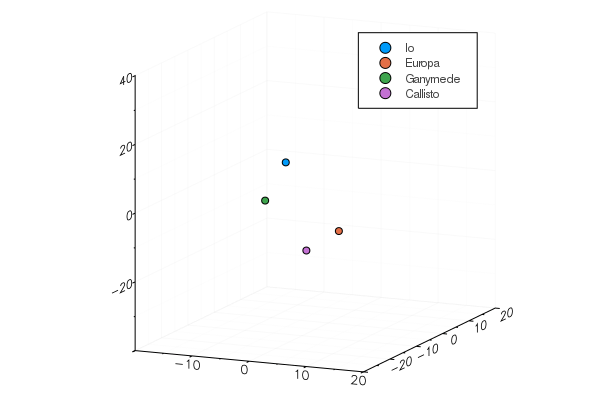

In [336]:
labels = ["Io" "Europa" "Ganymede" "Callisto"]
anim = @animate for positions in ani_states[1:100, :]
    scatter(positions[:, 1]', positions[:, 2]', positions[:, 3]',
        xlim=(-20, 20), ylim=(-30, 20), zlim=(-30, 30), label=labels)
    #scatter(positions[:, 1], positions[:, 2], xlim=(-30, 30), ylim=(-30, 30))
    #scatter(positions', xlim=(-30, 30), ylim=(-30, 30))
    #scatter(x, y, xlim=(-30, 30), ylim=(-30, 30))
end
gif(anim, fps=15)

┌ Info: Saved animation to 
│   fn = /home/jaume/Sync/proj/aoc/day12/tmp.gif
└ @ Plots /home/jaume/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/home/jaume/Sync/proj/aoc/day12/tmp.gif")
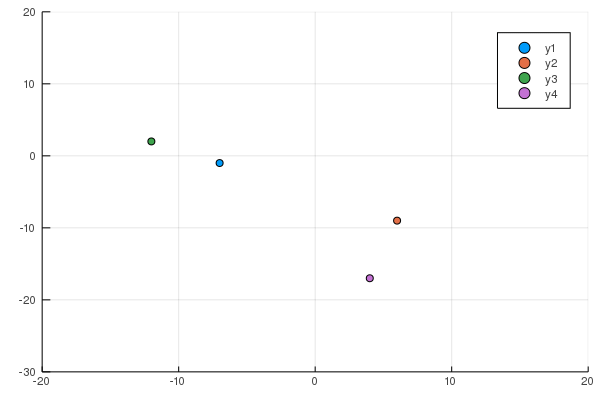

In [332]:
#plt = scatter(xlim=(-30, 30), ylim=(-30, 30))
anim = @animate for positions in ani_states[1:100, :]
    scatter(positions[:, 1]', positions[:, 2]',
        xlim=(-20, 20), ylim=(-30, 20))
end
gif(anim, fps=10)

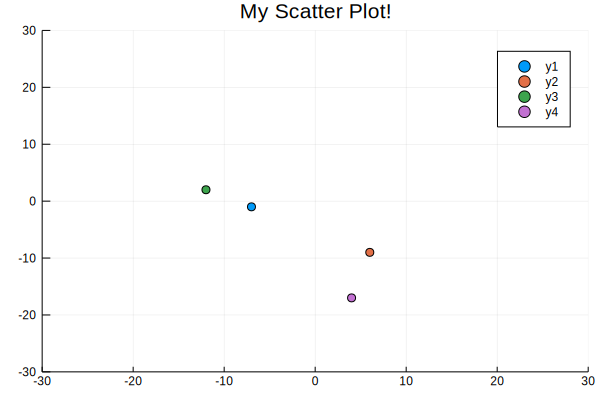

In [323]:
moment = ani_states[1]
scatter(moment[:, 1]', moment[:, 2]', title="My Scatter Plot!", xlim=(-30, 30), ylim=(-30, 30))

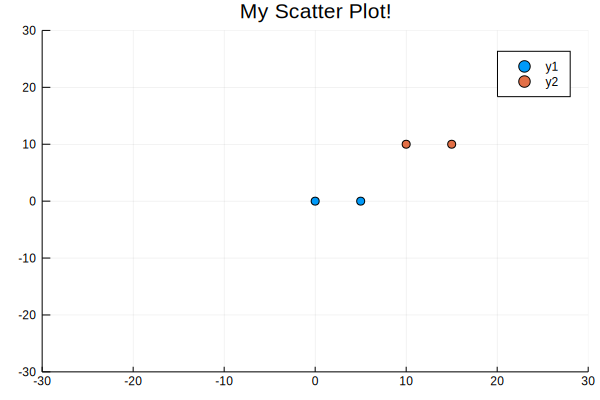

In [315]:
scatter([0 10; 5 15], [0 10; 0 10], title="My Scatter Plot!", xlim=(-30, 30), ylim=(-30, 30))

In [263]:
using Pkg
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [===============================>         ]  76.5 % Resolving package versions...
 Installed NaNMath ──────────── v0.3.3
 Installed Showoff ──────────── v0.3.1
 Installed PlotThemes ───────── v1.0.0
 Installed SortingAlgorithms ── v0.3.1
 Installed GeometryTypes ────── v0.7.6
 Installed Plots ────────────── v0.28.3
 Installed DataStructures ───── v0.17.6
 Installed Missings ─────────── v0.4.3
 Installed GR ───────────────── v0.44.0
 Installed Requires ─────────── v0.5.2
 Installed RecipesBase ──────── v0.7.0
 Installed PlotUtils ────────── v0.6.1
 Installed FixedPointNumbers ── v0.6.1
 Installed DataAPI ──────────── v1.1.0
 Installed Reexport ─────────── v0.2.0
 Installed StatsBase ────────── v0.32.0
 Installed Measures ─────────── v0.3.0
 Installed OrderedCollections ─ v1.1.0
 Installed FFM

In [362]:
p = copy(epositions)
id = 1
others = p[1:4 .!= id, :]
diffs = (others .> p[id, :]') - (others .< p[id, :]')
sum(diffs, dims = 1)'

3×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
  3
 -1
 -1

In [363]:
p = copy(epositions)
id = 1
diffs = (p .> p[id, :]') - (p .< p[id, :]')
sum(diffs, dims = 1)'

3×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
  3
 -1
 -1

In [364]:
p = copy(epositions)
id = 1
(p .> p[id, :]')

4×3 BitArray{2}:
 0  0  0
 1  0  0
 1  0  1
 1  1  0

In [369]:
p

4×3 Array{Int64,2}:
 -1    0   2
  2  -10  -7
  4   -8   8
  3    5  -1

In [375]:
p[1:1, :]

1×3 Array{Int64,2}:
 -1  0  2

In [376]:
p[1, :]

3-element Array{Int64,1}:
 -1
  0
  2

In [377]:
p[1, :]'

1×3 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 -1  0  2

In [368]:
p = copy(epositions)
id = 1
p .> p[id, :]

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 4 and 3")

In [ ]:
mapslices(>, )

In [223]:
using Profile
@profile find_first(ipositions)

not found [224 141 -385; -127 125 -413; -194 -67 206; 88 -224 570][-44 43 -6; -14 -81 -18; 46 40 13; 12 -2 11]


In [224]:
Profile.print()

1    ./multidimensional.jl:682; _unsafe_getindex(::IndexLinear, ::...
 1 ./abstractarray.jl:627; similar
  1 ./array.jl:334; similar
   1 ./boot.jl:414; Array
    1 ./boot.jl:406; Array
1    ./reducedim.jl:238; _mapreducedim!(::typeof(identity),...
4538 ./task.jl:333; (::IJulia.var"#15#18")()
 4538 ...F1GUo/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  4538 ./essentials.jl:708; invokelatest
   4538 ./essentials.jl:709; #invokelatest#1
    4538 ...c/execute_request.jl:67; execute_request(::ZMQ.Socket, ::...
     4538 .../SoftGlobalScope.jl:218; softscope_include_string(::Modu...
      4538 ./boot.jl:330; eval
       4073 ./In[221]:10; find_first(::Array{Int64,2})
        1248 ./In[218]:3; next(::Array{Int64,2}, ::Arr...
         622 ./abstractarray.jl:981; getindex
          599 ./indices.jl:297; to_indices
           599 ...ltidimensional.jl:645; to_indices
            599 ./indices.jl:250; to_index
             599 ./indices.jl:267; to_index
              599 ...tidimensional.jl:566; 

                  1 ./simdloop.jl:77; macro expansion
                   1 ./reducedim.jl:259; macro expansion
                    1 ./reduce.jl:24; add_sum
                     1 ./int.jl:53; +
                  1 ./simdloop.jl:78; macro expansion
                   1 ./int.jl:53; +
                23 ./reducedim.jl:172; reducedim_init
                 23 ./reducedim.jl:93; reducedim_initarray
                  23 ./reducedim.jl:92; reducedim_initarray
                   21 ./abstractarray.jl:635; similar
                    21 ./array.jl:334; similar
                     21 ./boot.jl:414; Array
                      21 ./boot.jl:406; Array
                   1  ./array.jl:313; fill!(::Array{Int64,2}, ...
         38 ...bra/src/adjtrans.jl:124; adjoint
          38 ...bra/src/adjtrans.jl:95; Adjoint
           38 ...ra/src/adjtrans.jl:39; Adjoint
        87   ./In[218]:7; next(::Array{Int64,2}, ::Arr...
         30 ./abstractarray.jl:981; getindex
          30 ./multidimensional.jl:67

               1 ./reshapedarray.jl:115; reshape
                1 ./reshapedarray.jl:112; reshape
                 1 ./reshapedarray.jl:176; _reshape
                  1 ./reshapedarray.jl:191; __reshape
                   1 ./tuple.jl:139; map
                    1 ./multinverses.jl:89; SignedMultiplicativeInverse
                     1 ./multinverses.jl:63; Base.MultiplicativeInver...
                      1 ./number.jl:105; divrem
                       1 ./int.jl:231; rem
             3  ./abstractarray.jl:2203; hash(::Array{Int64,2}, ::UI...
              3 ...ltidimensional.jl:486; getindex
               3 ./array.jl:745; getindex
             37 ./abstractarray.jl:2204; hash(::Array{Int64,2}, ::UI...
              36 ./pair.jl:52; hash(::Pair{CartesianIndex{...
               14 ./float.jl:571; hash
                14 ./float.jl:567; hx
                 14 ./hashing.jl:62; hash_uint64
                  2 ./hashing.jl:29; hash_64_64
                   2 ./int.jl:53; +
         

  0.077511 seconds (449.26 k allocations: 48.330 MiB)


┌ Info: Saved animation to 
│   fn = /home/jaume/Sync/proj/aoc/day12/tmp.gif
└ @ Plots /home/jaume/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/home/jaume/Sync/proj/aoc/day12/tmp.gif")
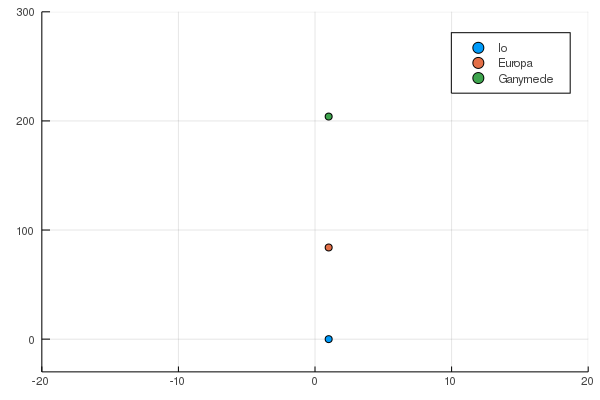

In [578]:
function next_x(positions, velocities)
    for i in 1:3
        velocities[i] += ((positions[i] < positions[1]) - (positions[i] > positions[1]) +
                    (positions[i] < positions[2]) - (positions[i] > positions[2]) +
                    (positions[i] < positions[3]) - (positions[i] > positions[3]))
    end
    positions += velocities
    positions, velocities
end

function animation(ipositions)
    positions = ipositions
    velocities = zeros(Int64, 3)

    states = Vector()
    push!(states, copy(positions))
    step = 0
    while step < 200_000
        step += 1
        positions, velocities = next_x(positions, velocities)
        push!(states, copy(positions))
    end
    states
end

@time ani_states = animation([0, 84, 204])

labels = ["Io" "Europa" "Ganymede" "Callisto"]
anim = @animate for positions in ani_states[1:1000, :]
    scatter(positions[:]',
        xlim=(-20, 20), ylim=(-30, 300), label=labels)
end
gif(anim, fps=15)